<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [4]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [8]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\johan\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=84d559225d62a61300304fcd49555bfdf2548066e523333bd78849a973301220
  Stored in directory: C:\Users\johan\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [8]:
data = pd.read_csv('reviews_vidjew_es.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

Entrenamiento (training) y prueba (test). Usualmente 80% training y 20% test.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


### `[8 pts]` Punto 2: Hacer  pre-procesamiento del texto

In [20]:
import nltk
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x00000268E30E4FC8>>

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.review_body.values);

In [24]:
X_train = tfidf_vect.transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [25]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [26]:
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games
...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games


In [27]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [28]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [29]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\johan\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [30]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Exactitud

In [32]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84
Árbol de decisión:      0.78


# Otras métricas

In [35]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):.2f}")
    print(f"Árbol de decisión: {metrica(y_test, y_pred_dt, pos_label='jewelry'):.2f}")
    print()

precision_score
Naive Bayes: 0.81
Regresión Logística: 0.86
SVM: 0.82
Árbol de decisión: 0.76

recall_score
Naive Bayes: 0.95
Regresión Logística: 0.86
SVM: 0.86
Árbol de decisión: 0.80

f1_score
Naive Bayes: 0.87
Regresión Logística: 0.86
SVM: 0.84
Árbol de decisión: 0.78



In [48]:
print(classification_report(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200

              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

              precision    recall  f1-score   support

     jewelry       0.82      0.86      0.84        97
 video_games       0.86      0.83      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

              preci

###  `[BONUS: 3 pts]` Matriz de confusión

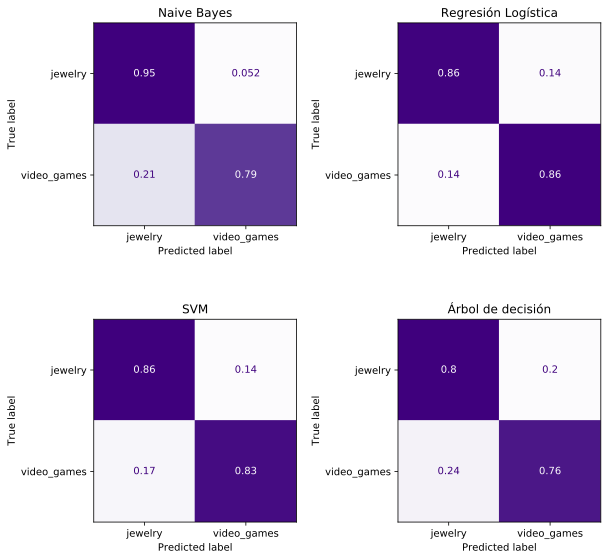

In [58]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Purples", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Purples', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Purples', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Purples', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [61]:
# Resultados
nuevos = ['Hola como estás?', 'LLAMA YA Y OBTEN EL 80% DE DESCUENTO $$$$$$$']
nuevos_trans = tfidf_vect.transform(nuevos)
dt.predict(nuevos_trans)

array(['video_games', 'video_games'], dtype=object)

In [60]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [62]:
# Las palabras que contribuyen a la clase 1
[(vocab[e[0]], round(e[1],2)) for e in zip(svm.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('pulsera', -1.96),
 ('foto', -1.94),
 ('calidad', -1.87),
 ('gracias', -1.85),
 ('bonitos', -1.84),
 ('bonita', -1.55),
 ('cadena', -1.53),
 ('plata', -1.43),
 ('pendientes', -1.2),
 ('cierre', -1.16)]

In [63]:
[(vocab[e[0]],round(e[1],2)) for e in zip(dt.feature_importances_.argsort(), sorted(dt.feature_importances_))][-10:]

[('perfecto', 0.02),
 ('bonita', 0.02),
 ('grandes', 0.02),
 ('foto', 0.02),
 ('pulsera', 0.03),
 ('bonitos', 0.03),
 ('bonito', 0.03),
 ('calidad', 0.03),
 ('mando', 0.06),
 ('juego', 0.12)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

In [ ]:
El modelo con el cúal me quedaria es el SVM porque es el que menor grado de error tuvo en los falsos positivos, mientras que los
demás modelos presentan falsos positivos bastante altos.